In [1]:
from google.colab import files
uploaded = files.upload()

Saving VNM.csv to VNM.csv


In [2]:
#1. Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
# 2. Read file VNM
df = pd.read_csv('VNM.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df1=df.reset_index()['Price']

In [4]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1># 4. Split the data into training, testing arcording to 7:3

In [5]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [6]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [9]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 9s 261ms/step - loss: 0.0894
Epoch 2/100
13/13 [==============================] - 2s 157ms/step - loss: 0.0180
Epoch 3/100
13/13 [==============================] - 2s 164ms/step - loss: 0.0084
Epoch 4/100
13/13 [==============================] - 2s 155ms/step - loss: 0.0053
Epoch 5/100
13/13 [==============================] - 2s 159ms/step - loss: 0.0042
Epoch 6/100
13/13 [==============================] - 2s 185ms/step - loss: 0.0038
Epoch 7/100
13/13 [==============================] - 3s 254ms/step - loss: 0.0036
Epoch 8/100
13/13 [==============================] - 2s 157ms/step - loss: 0.0036
Epoch 9/100
13/13 [==============================] - 2s 160ms/step - loss: 0.0034
Epoch 10/100
13/13 [==============================] - 2s 158ms/step - loss: 0.0033
Epoch 11/100
13/13 [==============================] - 2s 159ms/step - loss: 0.0034
Epoch 12/100
13/13 [==============================] - 3s 216ms/step - loss: 0.0032
Epoch 13/100


In [11]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

10/10 [==============================] - 1s 82ms/step


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [13]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 1238.3865669897896
Test MAE:  970.4758184523805
Test MAPE:  1.419329464921819


In [14]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.15281215]
101
1 day input [0.18257135 0.17154416 0.16970474 0.15867756 0.16602964 0.15316303
 0.14948792 0.15684    0.15132548 0.15684    0.16786719 0.17338171
 0.16235267 0.15500059 0.14765037 0.14948792 0.14948792 0.14765037
 0.14948792 0.15867756 0.15684    0.16786719 0.16051511 0.16051511
 0.16051511 0.20462758 0.23954856 0.23219648 0.22852137 0.2340359
 0.22300685 0.22300685 0.24138612 0.24506309 0.24138612 0.23219648
 0.24138612 0.25976724 0.23771101 0.24138612 0.20462758 0.21014211
 0.20462758 0.21933174 0.21381722 0.19892316 0.18216735 0.18030559
 0.1840291  0.19147613 0.18030559 0.1709968  0.17844383 0.17844383
 0.17844383 0.17658207 0.16541153 0.1709968  0.15982626 0.18775262
 0.18216735 0.16541153 0.16541153 0.16168802 0.1579645  0.15982626
 0.12631463 0.10955882 0.11328233 0.11328233 0.10955882 0.10025003
 0.10955882 0.12259112 0.12817639 0.13562342 0.13934693 0.14307045
 0.1840291  0.18216735 0.1579645  0.15610275 0.14307045 0.15610275
 0.16541153 0.16913505 0.16541153 

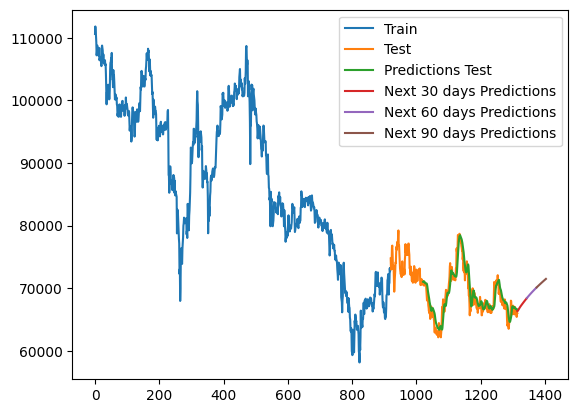

In [15]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># 4. Split the data into training, testing arcording to 8:2

In [16]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [17]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 9s 157ms/step - loss: 0.0669
Epoch 2/100
15/15 [==============================] - 2s 163ms/step - loss: 0.0121
Epoch 3/100
15/15 [==============================] - 2s 157ms/step - loss: 0.0056
Epoch 4/100
15/15 [==============================] - 3s 169ms/step - loss: 0.0040
Epoch 5/100
15/15 [==============================] - 4s 262ms/step - loss: 0.0036
Epoch 6/100
15/15 [==============================] - 2s 161ms/step - loss: 0.0034
Epoch 7/100
15/15 [==============================] - 2s 161ms/step - loss: 0.0033
Epoch 8/100
15/15 [==============================] - 2s 160ms/step - loss: 0.0032
Epoch 9/100
15/15 [==============================] - 2s 159ms/step - loss: 0.0030
Epoch 10/100
15/15 [==============================] - 4s 260ms/step - loss: 0.0031
Epoch 11/100
15/15 [==============================] - 2s 160ms/step - loss: 0.0031
Epoch 12/100
15/15 [==============================] - 2s 158ms/step - loss: 0.0032
Epoch 13/100


In [22]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 34ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [24]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 880.6344177880924
Test MAE:  646.2258825231482
Test MAPE:  0.9506848869831888


In [25]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.14450973]
101
1 day input [0.18257135 0.17154416 0.16970474 0.15867756 0.16602964 0.15316303
 0.14948792 0.15684    0.15132548 0.15684    0.16786719 0.17338171
 0.16235267 0.15500059 0.14765037 0.14948792 0.14948792 0.14765037
 0.14948792 0.15867756 0.15684    0.16786719 0.16051511 0.16051511
 0.16051511 0.20462758 0.23954856 0.23219648 0.22852137 0.2340359
 0.22300685 0.22300685 0.24138612 0.24506309 0.24138612 0.23219648
 0.24138612 0.25976724 0.23771101 0.24138612 0.20462758 0.21014211
 0.20462758 0.21933174 0.21381722 0.19892316 0.18216735 0.18030559
 0.1840291  0.19147613 0.18030559 0.1709968  0.17844383 0.17844383
 0.17844383 0.17658207 0.16541153 0.1709968  0.15982626 0.18775262
 0.18216735 0.16541153 0.16541153 0.16168802 0.1579645  0.15982626
 0.12631463 0.10955882 0.11328233 0.11328233 0.10955882 0.10025003
 0.10955882 0.12259112 0.12817639 0.13562342 0.13934693 0.14307045
 0.1840291  0.18216735 0.1579645  0.15610275 0.14307045 0.15610275
 0.16541153 0.16913505 0.16541153 

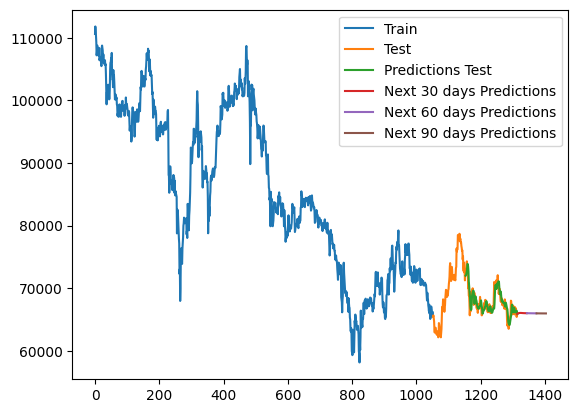

In [26]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># 4. Split the data into training, testing arcording to 9:1

In [27]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [28]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 10s 265ms/step - loss: 0.0425
Epoch 2/100
17/17 [==============================] - 3s 164ms/step - loss: 0.0071
Epoch 3/100
17/17 [==============================] - 3s 164ms/step - loss: 0.0042
Epoch 4/100
17/17 [==============================] - 3s 164ms/step - loss: 0.0037
Epoch 5/100
17/17 [==============================] - 4s 212ms/step - loss: 0.0035
Epoch 6/100
17/17 [==============================] - 4s 211ms/step - loss: 0.0034
Epoch 7/100
17/17 [==============================] - 3s 166ms/step - loss: 0.0032
Epoch 8/100
17/17 [==============================] - 3s 166ms/step - loss: 0.0031
Epoch 9/100
17/17 [==============================] - 3s 163ms/step - loss: 0.0029
Epoch 10/100
17/17 [==============================] - 4s 266ms/step - loss: 0.0027
Epoch 11/100
17/17 [==============================] - 3s 166ms/step - loss: 0.0027
Epoch 12/100
17/17 [==============================] - 3s 165ms/step - loss: 0.0026
Epoch 13/100

In [33]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 52ms/step


In [34]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [35]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 823.8780117785378
Test MAE:  678.1408770161286
Test MAPE:  1.028063978360514


In [36]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.14577696]
101
1 day input [0.18257135 0.17154416 0.16970474 0.15867756 0.16602964 0.15316303
 0.14948792 0.15684    0.15132548 0.15684    0.16786719 0.17338171
 0.16235267 0.15500059 0.14765037 0.14948792 0.14948792 0.14765037
 0.14948792 0.15867756 0.15684    0.16786719 0.16051511 0.16051511
 0.16051511 0.20462758 0.23954856 0.23219648 0.22852137 0.2340359
 0.22300685 0.22300685 0.24138612 0.24506309 0.24138612 0.23219648
 0.24138612 0.25976724 0.23771101 0.24138612 0.20462758 0.21014211
 0.20462758 0.21933174 0.21381722 0.19892316 0.18216735 0.18030559
 0.1840291  0.19147613 0.18030559 0.1709968  0.17844383 0.17844383
 0.17844383 0.17658207 0.16541153 0.1709968  0.15982626 0.18775262
 0.18216735 0.16541153 0.16541153 0.16168802 0.1579645  0.15982626
 0.12631463 0.10955882 0.11328233 0.11328233 0.10955882 0.10025003
 0.10955882 0.12259112 0.12817639 0.13562342 0.13934693 0.14307045
 0.1840291  0.18216735 0.1579645  0.15610275 0.14307045 0.15610275
 0.16541153 0.16913505 0.16541153 

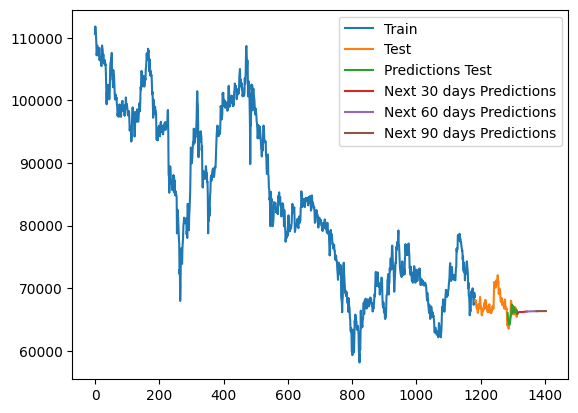

In [37]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()